In [1]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
import splitfolders
%matplotlib inline

# Viewing the Data

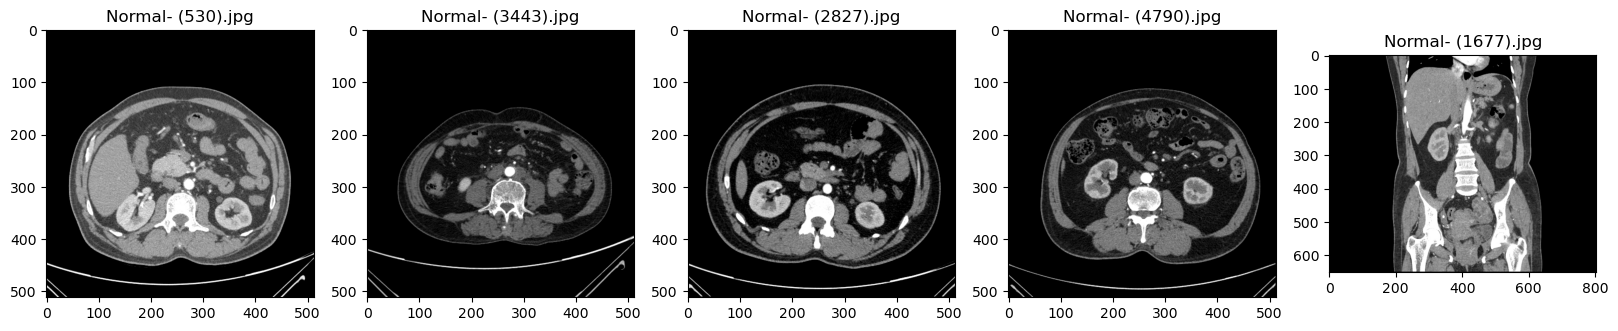

In [3]:
# Viewing Sample Normal Data
plt.figure(figsize=(20,20))
test_folder=r'/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

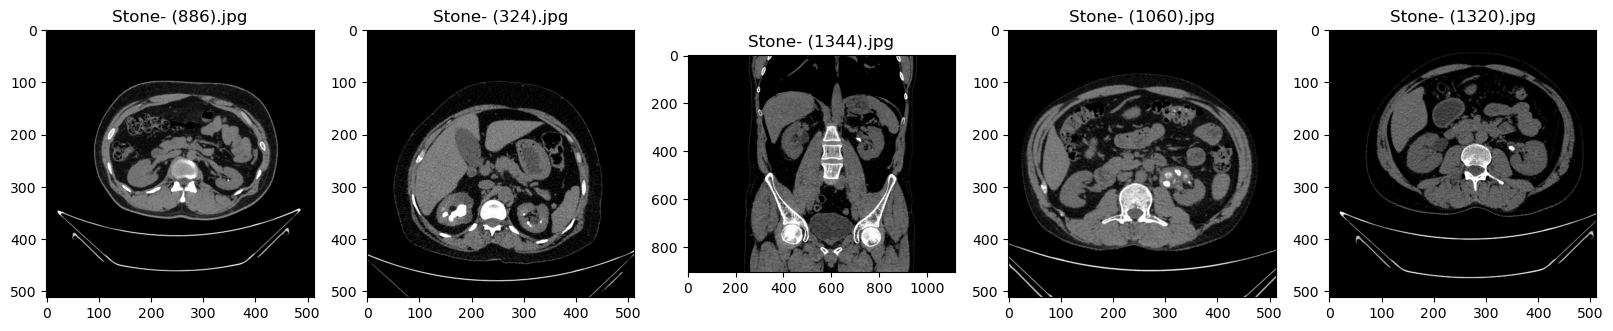

In [4]:
# Viewing Sample Stone Data
plt.figure(figsize=(20,20))
test_folder=r'/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

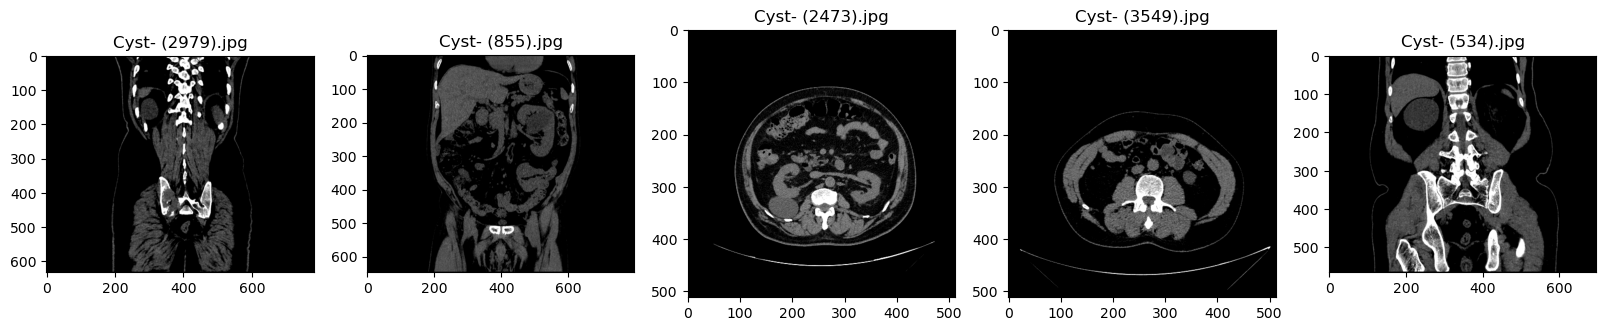

In [5]:
# Viewing Sample Cyst Data
plt.figure(figsize=(20,20))
test_folder=r'/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

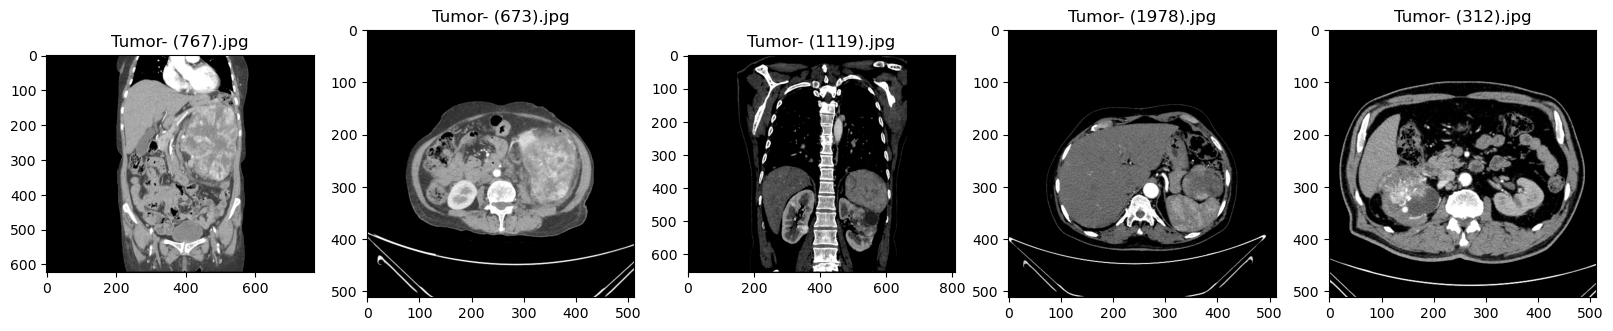

In [6]:
# Viewing Sample Tumor Data
plt.figure(figsize=(20,20))
test_folder=r'/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [7]:
# Making directories for augmented data
os.makedirs('/kaggle/working/Data')
os.makedirs('/kaggle/working/Data/Normal')
os.makedirs('/kaggle/working/Data/Stone')
os.makedirs('/kaggle/working/Data/Cyst')
os.makedirs('/kaggle/working/Data/Tumor')

In [8]:
# import shutil
# shutil.rmtree("/kaggle/working/Data")

In [9]:
# Augmenting and Storing Normal Kidney Images
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
datagen = ImageDataGenerator(        
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))

image_directory = r'/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/'
SIZE = 224
dataset = []
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):    
    if (image_name.split('.')[1] == 'jpg'):        
        image = io.imread(image_directory + image_name)        
        image = Image.fromarray(image, 'RGB')        
        image = image.resize((SIZE,SIZE)) 
        dataset.append(np.array(image))
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir= r'/kaggle/working/Data/Normal',
                          save_prefix='Normal',
                          save_format='jpg'):    
    i += 1    
    if i > 500:        
        break

In [10]:
# Augmenting and Storing Kidney Stone Images
datagen = ImageDataGenerator(        
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))

image_directory = r'/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/'
SIZE = 224
dataset = []
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):    
    if (image_name.split('.')[1] == 'jpg'):        
        image = io.imread(image_directory + image_name)        
        image = Image.fromarray(image, 'RGB')        
        image = image.resize((SIZE,SIZE)) 
        dataset.append(np.array(image))
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir= r'/kaggle/working/Data/Stone',
                          save_prefix='Stone',
                          save_format='jpg'):    
    i += 1    
    if i > 500:        
        break

In [11]:
# Augmenting and Storing Kidney Cyst Images
datagen = ImageDataGenerator(        
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))

image_directory = r'/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/'
SIZE = 224
dataset = []
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):    
    if (image_name.split('.')[1] == 'jpg'):        
        image = io.imread(image_directory + image_name)        
        image = Image.fromarray(image, 'RGB')        
        image = image.resize((SIZE,SIZE)) 
        dataset.append(np.array(image))
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir= r'/kaggle/working/Data/Cyst',
                          save_prefix='Cyst',
                          save_format='jpg'):    
    i += 1    
    if i > 500:        
        break

In [12]:
# Augmenting and Storing Kidney Tumor Images
datagen = ImageDataGenerator(        
        rotation_range = 40,
        shear_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))

image_directory = r'/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/'
SIZE = 224
dataset = []
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):    
    if (image_name.split('.')[1] == 'jpg'):        
        image = io.imread(image_directory + image_name)        
        image = Image.fromarray(image, 'RGB')        
        image = image.resize((SIZE,SIZE)) 
        dataset.append(np.array(image))
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir= r'/kaggle/working/Data/Tumor',
                          save_prefix='Tumor',
                          save_format='jpg'):    
    i += 1    
    if i > 500:        
        break 45  

SyntaxError: invalid syntax (1068567288.py, line 26)

In [ ]:
# Viewing Sample Normal Data
plt.figure(figsize=(20,20))
test_folder=r'/kaggle/working/Data/Normal'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:
# Viewing Sample Cyst Data
plt.figure(figsize=(20,20))
test_folder=r'/kaggle/working/Data/Cyst'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:
# Viewing Sample Tumor Data
plt.figure(figsize=(20,20))
test_folder=r'/kaggle/working/Data/Tumor'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:
# Viewing Sample Stone Data
plt.figure(figsize=(20,20))
test_folder=r'/kaggle/working/Data/Stone'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import Model

batch_size = 128
vgg = VGG19(input_shape=(224, 224, 3), include_top = False) 
for layer in vgg.layers:
  layer.trainable = False
x = Flatten()(vgg.output)
x = Dense(4096, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
prediction = Dense(4, activation='softmax')(x) 
#Creating model object 
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

In [ ]:
splitfolders.ratio(r"/kaggle/working/Data", output=r"/kaggle/working/output/",
    seed=336, ratio=(.8, .1, .1), group_prefix=None, move=False)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()
train_data_dir = r'/kaggle/working/output/train/'
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    class_mode="categorical",
    target_size = (224, 224))

val_data_dir = r'/kaggle/working/output/val/'
validation_generator = train_datagen.flow_from_directory(
    val_data_dir,
    target_size = (224, 224),
    class_mode="categorical")

test_data_dir = r'/kaggle/working/output/test/'
test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    shuffle=False,
    target_size = (224, 224),
    class_mode="categorical")

In [ ]:
model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = 50,
            callbacks=[callback],
            batch_size = batch_size)

In [ ]:
score = model.evaluate(test_generator, verbose=0)

In [ ]:
#Test accuracy
score

In [ ]:
from sklearn.metrics import classification_report
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print(classification_report(test_generator.classes, y_pred, target_names=list(train_generator.class_indices.keys())))

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# Evaluating the model
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:

!pip install gradio

In [ ]:
class_names = ['Cyst','Normal','Stone','Tumor']

In [ ]:
def predict_image(img):
  img_4d=img.reshape(-1,224,224,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(4)}

In [ ]:
import gradio as gr

In [ ]:
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=4)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')